Compresive Strength Concrete Problem

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tp
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models
from keras import layers
from tensorflow.keras import optimizers
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
print (tf.__version__)

2.4.1


# Load Data

In [111]:
data=pd.read_csv("/content/compresive_strength_concrete.csv")

# Data Analysis

In [112]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [113]:
data.shape

(1030, 9)

There are 9 Columns (need to be renamed). 1030 Rows of data



In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

All feature column data is in numbers hence no need to vectorize the data. 

In [115]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Data Cleaning

renaming columns

In [116]:
data.columns = ['Cement ','Blast_Furnace','Fly_Ash','Water','Superplasticizer','Coarse_Aggregate','Fine_Aggregate','Age','CC_Strength']

Checking Null Values if Any

In [117]:
data.isnull().sum()

Cement              0
Blast_Furnace       0
Fly_Ash             0
Water               0
Superplasticizer    0
Coarse_Aggregate    0
Fine_Aggregate      0
Age                 0
CC_Strength         0
dtype: int64

In [118]:
np.where(data.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

Drop CC Strenght column from X as it is our measurement feature. 

In [119]:
x = data.drop('CC_Strength', axis=1)
y = data['CC_Strength']

# Normalizing Data with Mean-Std & Split 50% Training / 20% Validation / 30% Testing

In [120]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.3, random_state=42)

# assign features and target columns

In [121]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std
x_test -= mean
x_test /= std

In [122]:
mean_label = y_train.mean(axis=0)
y_train -= mean_label 
std_label = y_train.std(axis=0)
y_train /= std_label
y_test -= mean_label
y_test /= std_label

In [123]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,721.0,-7.830075e-17,1.0,-1.683389,-0.852826,-0.068405,0.721554,2.358687
Blast_Furnace,721.0,-1.684583e-16,1.0,-0.854703,-0.854703,-0.603898,0.798331,3.242540
Fly_Ash,721.0,4.194518e-16,1.0,-0.816346,-0.816346,-0.816346,1.028017,2.244512
Water,721.0,2.044289e-15,1.0,-2.836060,-0.765956,0.184023,0.481777,3.081222
Superplasticizer,721.0,4.559460e-16,1.0,-1.013292,-1.013292,-0.020966,0.657123,4.312190
Coarse_Aggregate,721.0,-2.876879e-15,1.0,-2.200993,-0.532401,-0.073857,0.843231,2.180652
Fine_Aggregate,721.0,9.605469e-15,1.0,-2.216980,-0.590791,0.085644,0.616058,2.757686
Age,721.0,2.432944e-17,1.0,-0.730728,-0.519863,-0.292777,0.161394,5.173499


In [124]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy().astype('float32')
x_test = x_test.to_numpy()
y_test = y_test.to_numpy().astype('float32')

In [125]:
len(x_train)

721

In [126]:
len(x_test)

309

Training & Validation data consists of only 721 records. Hence best to use K Fold validation method for the model.

Model Requirements: 3 Hidden Layers with 10,6,8 outputs. 
2 Models with relu & tanh. 

As it is a regression problem the loss will be mean squared error (mse) and metrics mean absolute error (mae)





# Relu Model

In [127]:
def build_model_relu():
    model = models.Sequential()
    model.add(layers.Dense(10, activation= 'relu',input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(8, activation= 'relu'))
    model.add(layers.Dense(6, activation= 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# Tanh Model

In [128]:
def build_model_tanh():
    model = models.Sequential()
    model.add(layers.Dense(10, activation= 'tanh',input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(8, activation= 'tanh'))
    model.add(layers.Dense(6, activation= 'tanh'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

K-fold Validation

In [129]:
k=4
num_val_samples = len(x_train) // k 
num_epochs = 100
all_scores = []

all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [x_train[:i * num_val_samples],
         x_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# Training Model

Relu Model Training

In [130]:
model = build_model_relu()
history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)
#all_scores_relu.append(val_mae)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

In [131]:
print (history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [132]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

In [133]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print ('avg mae history: ', average_mae_history) # Absolute error on every epoch. 

avg mae history:  [0.6571769118309021, 0.5294647216796875, 0.46809178590774536, 0.42295974493026733, 0.4082045555114746, 0.36994996666908264, 0.3487809896469116, 0.3523118197917938, 0.33016207814216614, 0.3288750648498535, 0.3174486458301544, 0.3187378942966461, 0.32138994336128235, 0.30811962485313416, 0.3160213232040405, 0.3078858554363251, 0.30365198850631714, 0.2964138686656952, 0.2991775870323181, 0.29298272728919983, 0.28988003730773926, 0.29044586420059204, 0.295745313167572, 0.28675514459609985, 0.294476717710495, 0.2761341631412506, 0.30084747076034546, 0.29330289363861084, 0.29322707653045654, 0.2939646542072296, 0.2814435660839081, 0.2680318355560303, 0.2862135171890259, 0.2778630256652832, 0.2647680342197418, 0.2710556983947754, 0.27347633242607117, 0.27197563648223877, 0.2616545259952545, 0.26990807056427, 0.26651790738105774, 0.29185885190963745, 0.26559844613075256, 0.26528194546699524, 0.2636544406414032, 0.2715822160243988, 0.2833801805973053, 0.26854532957077026, 0.26

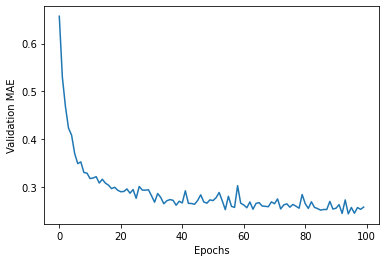

In [134]:
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

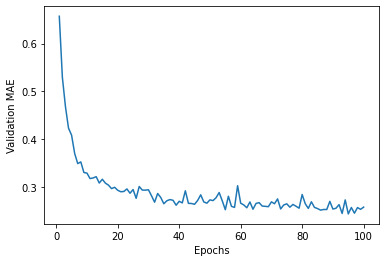

In [135]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [136]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

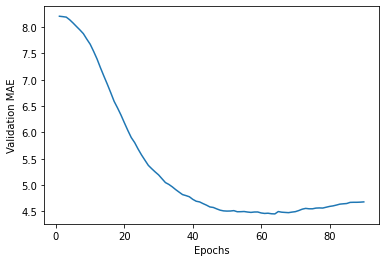

In [82]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

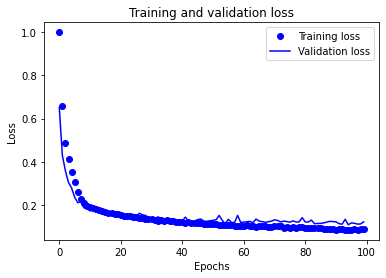

In [138]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(100)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

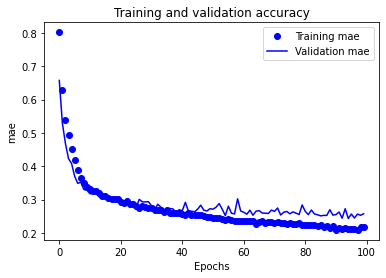

In [139]:
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

Tanh Model training

In [140]:
model = build_model_tanh()
history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

In [141]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

In [142]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print ('avg mae history: ', average_mae_history) # Absolute error on every epoch. 

avg mae history:  [0.5518326312303543, 0.4705364257097244, 0.42298318445682526, 0.3968481719493866, 0.3823852092027664, 0.36449775099754333, 0.3503640294075012, 0.34198610484600067, 0.3176918923854828, 0.3253401219844818, 0.3086736798286438, 0.30783115327358246, 0.3107500374317169, 0.3140563368797302, 0.30582159757614136, 0.3187595158815384, 0.30203716456890106, 0.2946407049894333, 0.300927072763443, 0.29717786610126495, 0.2872045785188675, 0.29667186737060547, 0.2947061061859131, 0.2925941050052643, 0.2992919832468033, 0.2902340888977051, 0.29525478184223175, 0.29273228347301483, 0.29566599428653717, 0.29509536921977997, 0.2926919460296631, 0.28414323925971985, 0.29630452394485474, 0.2903522700071335, 0.286162406206131, 0.2858172506093979, 0.28756339848041534, 0.28769536316394806, 0.27486705780029297, 0.2857697159051895, 0.28832314908504486, 0.29472239315509796, 0.2783645838499069, 0.2986886352300644, 0.28048089146614075, 0.28144074976444244, 0.29369181394577026, 0.2803581953048706, 0

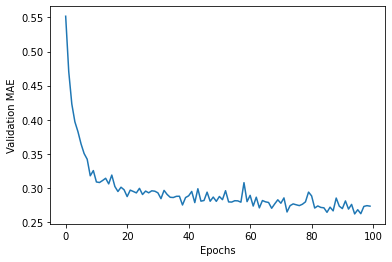

In [143]:
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

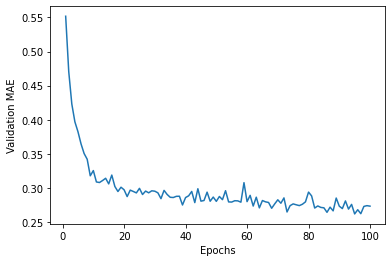

In [144]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

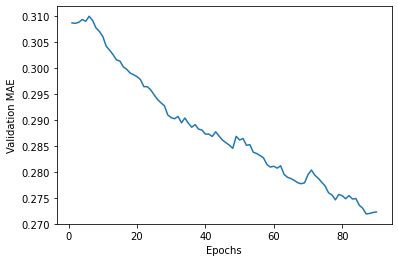

In [145]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

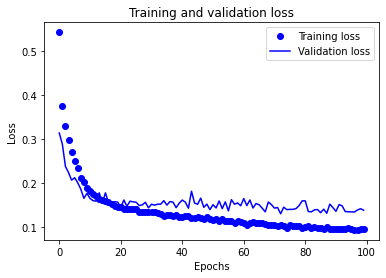

In [146]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(100)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

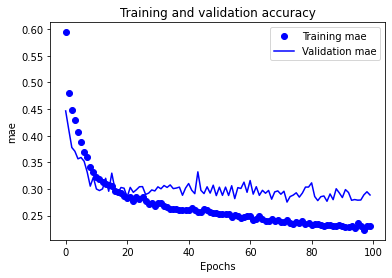

In [147]:
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

# Train Final Model

From the above training data we can see that average mean error is less in Relu + Epochs should be near 45 to avoid overfitting. 

In [183]:
model = build_model_relu()
history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=45, batch_size=1, verbose=0)

# Evaluation / Prediction

In [184]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)
print("mae score ",test_mae_score)
print("mse score ",test_mse_score)

10/10 [==============================] - 0s 2ms/step - loss: 0.1623 - mae: 0.3038
mae score  0.3038402199745178
mse score  0.16226227581501007


In [185]:
y_pred = model.predict(x_test)

# denormalization data to check predictions

In [186]:
def denormalize(x):
    return (x * std_label) + mean_label

In [187]:
y_pred = denormalize(y_pred)
y_pred = y_pred.flatten()
y_pred.shape

(309,)

In [188]:
y_true = denormalize(y_test)
y_true = y_true.flatten()
y_true.shape

(309,)

(0.0, 90.0)

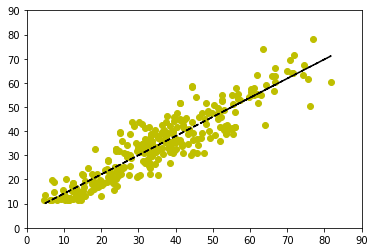

In [189]:
coef = np.polyfit(y_true,y_pred,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
plt.xlim(0, 90)
plt.ylim(0, 90)